In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.read_graphml("graphs/0005_500.graphml")
G

import itertools
def exhaustive_search(G): 
    input_set = set(range(len(G)))
    subsets = []
    n = len(input_set)
    
    # generate all subsets (complexy 2^V to generate * V to convert to set = O(V^2 * V))
    for r in range(n + 1):
        for subset in itertools.combinations(input_set, r):
            subsets.append(set(subset))

    best = input_set
    weight = 0
    for subset in subsets: # 2^n resultados para percorrer
        new_weight = 0
        for s in subset: # n^2 para calcular o peso
            for t in input_set - subset:
                new_weight += G[s][t]
        if new_weight > weight:
            best = subset
            weight = new_weight
    
    return best, input_set-best, weight
s,t, w = exhaustive_search(nx.adjacency_matrix(G).todense())


def heuristic_greedy(G):
    num_vertices = len(G)
    
    # Step 1: Extract edges and their weights
    edges = []
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):  # To avoid duplicate edges
            weight = G[i, j]
            edges.append((i, j, weight))

    # Step 2: Sort edges in descending order based on their weights
    edges.sort(key=lambda e: e[2], reverse=True)
    
    seen, S, T = set(), set(), set()

    cut_weight = 0
    # Step 3: Process each edge
    for u, v, weight in edges:
        if u not in seen and v not in seen: 
            # nenhum vertice visto
            cut_weight += weight
            seen.update({u,v})
            S.add(u)
            T.add(v)
        elif u in S and v not in seen:
            # u no primeiro set, v não visto
            cut_weight += weight
            seen.add(v)
            T.add(v)
        elif u in T and v not in seen:
            # u no segundo set, v não visto
            cut_weight += weight
            seen.add(v)
            S.add(v)
        elif v in S and u not in seen:
            # v no primeiro set, u não visto
            cut_weight += weight
            seen.add(u)
            T.add(u)
        elif v in T and u not in seen:
            # v no segundo set, u não visto
            cut_weight += weight
            seen.add(u)
            S.add(u)
        elif v in T and u in S:
            cut_weight += weight
        elif v in S and u in T:
            cut_weight += weight
        # v and u in the same set

    return S, T, cut_weight

s1,t1, w1 = heuristic_greedy(nx.adjacency_matrix(G).todense())


In [20]:
plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,   

})

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_9502/1034144032.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


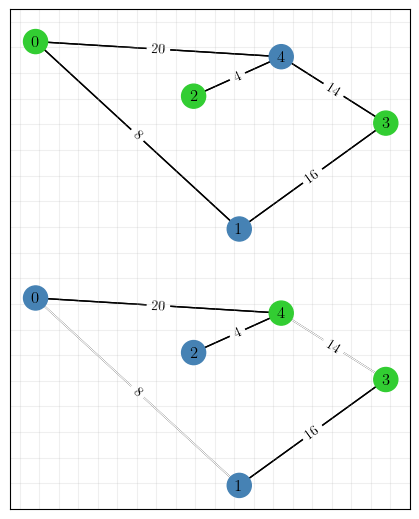

In [21]:
import random
import matplotlib.pyplot as plt
import networkx as nx


random.seed(259)  

plt.figure(figsize=(4, 5))
# Make the figure background transparent

# Assuming G is your graph object
space_limit = 1000  # might be important

# Assign random (x, y) positions to each node in a 1000x1000 grid
positions = {i: (random.randint(0, space_limit*2), random.randint(0, space_limit)) for i in G.nodes()}  # might be important



# Assign random colors to nodes
node_color_map = {node: "#4682B4" if int(node) in s1 else '#32CD32' for node in G.nodes()}
# Get edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')
# Create a custom list of edge colors where transparency is added if nodes have the same color
edge_colors = []
for u, v in G.edges():
    # If the two nodes have the same color, make the edge transparent (alpha = 0)
    if node_color_map[u] == node_color_map[v]:
        edge_colors.append((1, 1, 1, 0))  # White color with transparency
    else:
        edge_colors.append((0, 0, 0, 1))  # Solid black edge
# Draw the first graph (y = 0-1000)
nx.draw(G, pos=positions, with_labels=True, node_color=[node_color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors, alpha=1.0)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_weights)


# Shift the positions for the second graph (y = 1000-2000)
shifted_positions = {node: (x, y + space_limit) for node, (x, y) in positions.items()}
node_color_map = {node: "#4682B4" if int(node) in s else '#32CD32' for node in G.nodes()}
edge_colors = []
for u, v in G.edges():
    # If the two nodes have the same color, make the edge transparent (alpha = 0)
    if node_color_map[u] == node_color_map[v]:
        edge_colors.append((1, 1, 1, 0))  # White color with transparency
    else:
        edge_colors.append((0, 0, 0, 1))  # Solid black edge
nx.draw(G, pos=shifted_positions, with_labels=True, node_color=[node_color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos=shifted_positions, edge_color=edge_colors, alpha=1.0)
nx.draw_networkx_edge_labels(G, pos=shifted_positions, edge_labels=edge_weights)



plt.xticks(range(0, 2*space_limit + 1, 100))  # Set X-axis ticks from 0 to 1000, every 100 units
plt.yticks(range(0, space_limit * 2 + 1, 100))  # Set Y-axis ticks from 0 to 2000, every 100 units
plt.xlim(-50, space_limit*2)  # Set X-axis limit
plt.ylim(0, space_limit * 2-50)  # Set Y-axis limit to 0-2000

# Make sure tick labels (numbers) are visible and properly formatted
plt.tick_params(axis='both', which='both', labelsize=10)  # Set the size of tick labels
plt.gca().set_axis_on()
plt.grid(True, alpha=0.2)
plt.savefig("assets/exampGraph.png", dpi=900, transparent=True)

plt.tight_layout()
plt.show()
